In [1]:
import pandas as pd
from datetime import timedelta
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [3]:
df = pd.read_excel("frm_fr_2022.xlsx", engine='openpyxl')

In [4]:
df

,Unnamed: 0,Customer name,Total monetary value,Frequency,Recency
0,0,27 SARL,1063.02,3,141
1,1,3B PISCINE SARL,4144.30,2,143
2,2,3D LINER,233.36,1,17
3,3,A DEUX PLUS - ENTREPRENDRE,48.18,1,337
4,4,A ET P,107.04,1,336
...,...,...,...,...,...
1033,1033,WILLIAM HUMBERT,525.89,1,307
1034,1034,WONDERPOOL CREATION,1292.04,1,231
1035,1035,XPRESSEAU - DESMOULIN ADELINE,510.38,1,234
1036,1036,YACONO ALAIN AQUASERVICES66,6424.35,6,87


In [5]:
df2 = df[["Customer name", "Total monetary value", "Frequency", "Recency"]].copy()
df2.columns = ["customer", "monetary", "frequency", "recency"]

In [6]:
rfm=df2[['recency','frequency','monetary']]
rfm.index = df2["customer"]
rfm

,recency,frequency,monetary
customer,,,
27 SARL,141,3,1063.02
3B PISCINE SARL,143,2,4144.30
3D LINER,17,1,233.36
A DEUX PLUS - ENTREPRENDRE,337,1,48.18
A ET P,336,1,107.04
...,...,...,...
WILLIAM HUMBERT,307,1,525.89
WONDERPOOL CREATION,231,1,1292.04
XPRESSEAU - DESMOULIN ADELINE,234,1,510.38


# RFM Scoring

In [7]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['score']= rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str)
rfm['score'] = pd.to_numeric(rfm['score'])

In [8]:
pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1], retbins=True)

(customer
 27 SARL                          3
 3B PISCINE SARL                  3
 3D LINER                         5
 A DEUX  PLUS - ENTREPRENDRE      1
 A ET P                           1
                                 ..
 WILLIAM HUMBERT                  1
 WONDERPOOL CREATION              1
 XPRESSEAU - DESMOULIN ADELINE    1
 YACONO ALAIN AQUASERVICES66      3
 ZUSSY THIERRYELSASSLINER         1
 Name: recency, Length: 1038, dtype: category
 Categories (5, int64): [5 < 4 < 3 < 2 < 1],
 array([  1. ,  35. ,  78. , 143.2, 212. , 519. ]))

In [9]:
pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5], retbins=True)[1]

array([1.000e+00, 2.084e+02, 4.158e+02, 6.232e+02, 8.306e+02, 1.038e+03])

In [10]:
pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5], retbins=True)[1]

array([-1.952260e+03,  3.686480e+02,  9.102100e+02,  2.071670e+03,
        5.204226e+03,  5.190000e+05])

In [11]:
segment_dictionary = {"Champion TOP": [555, 545, 554],
                      "Growing Champion": [544, 454, 455, 445],
                      "Loyal Customer": [543,444,435,355,354,345,344,335],
                      "Potential Loyalist": [553,551,552,541,542,533,532,531,452,451,442,441,431,453,433,432,423,353,352,351,342,341,333,323],
                      "New Customer": [512,511,422,421,412,411,311],
                      "Promising": [525,524,523,522,521,515,514,513,425,424,413,414,415,315,314,313],
                      "Need Attention": [535,534,443,434,343,334,325,324],
                      "Cannot Lose Them": [155,154,144,214,215,115,114,113],
                      "About To Sleep": [331,321,312,221,213],
                      "At Risk": [255,254,245,244,253,252,243,242,235,234,225,224,153,152,145,143,142,135,134,133,125,124],
                      "Hibernating": [332,322,231,241,251,233,232,223,222,132,123,122,212,211],
                      "Lost": [111,112,121,131,141,151]
                      }

def rfm_segment(score):
    for k, v in segment_dictionary.items():
        if score in v:
            return k


In [12]:
rfm['segment'] = rfm['score'].apply(lambda score : rfm_segment(score))
rfm['cluster'] = 3
rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,segment,cluster
customer,,,,,,,,,
27 SARL,141,3,1063.02,3,3,3,333,Potential Loyalist,3
3B PISCINE SARL,143,2,4144.30,3,2,4,324,Need Attention,3
3D LINER,17,1,233.36,5,1,1,511,New Customer,3
A DEUX PLUS - ENTREPRENDRE,337,1,48.18,1,1,1,111,Lost,3
A ET P,336,1,107.04,1,1,1,111,Lost,3
...,...,...,...,...,...,...,...,...,...
WILLIAM HUMBERT,307,1,525.89,1,2,2,122,Hibernating,3
WONDERPOOL CREATION,231,1,1292.04,1,2,3,123,Hibernating,3
XPRESSEAU - DESMOULIN ADELINE,234,1,510.38,1,2,2,122,Hibernating,3


<Figure size 14400x14400 with 0 Axes>

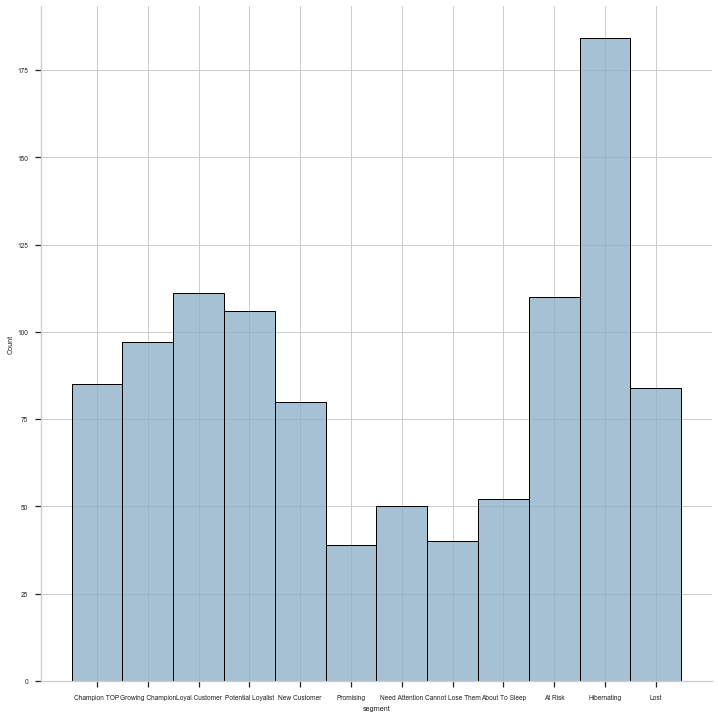

In [13]:
rfm['segment'] = pd.Categorical(rfm['segment'], categories=segment_dictionary.keys())

plt.figure(figsize=(200,200))
sns.set_context("notebook", font_scale=0.6)
sns.set_palette('twilight')
sns.displot(rfm['segment'], height=10)

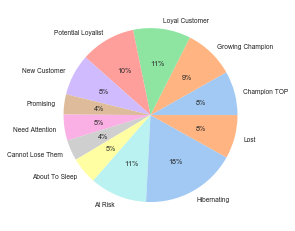

In [14]:
colors = sns.color_palette("pastel", n_colors=12)
plt.pie(rfm.groupby('segment').size(),labels=rfm.groupby('segment').size().index, colors = colors, autopct='%.0f%%')
plt.show()

In [15]:
rfm.groupby('segment').agg({
    'recency' : ['mean', 'min','max'],
    'frequency' : ['mean', 'min','max'],
    'monetary' : ['mean','min','max','count']
})

recency            frequency              monetary  \
                          mean  min  max       mean min max          mean   
segment                                                                     
Champion TOP         18.035294    2   35  14.211765   4  63  13413.942588   
Growing Champion     47.618557    7   78   9.144330   3  32   8408.052784   
Loyal Customer       90.045045   15  143   6.963964   2  33   5475.100541   
Potential Loyalist   60.235849    6  143   3.660377   1  18   1031.387264   
New Customer         53.550000    1  141   1.112500   1   2    364.850750   
Promising            43.051282    2  142   1.179487   1   2   1584.885641   
Need Attention       78.540000    7  143   3.260000   1   6   2462.165600   
Cannot Lose Them    267.175000  190  436   1.775000   1   7  16353.084750   
About To Sleep      148.711538   79  212   1.250000   1   3    373.908462   
At Risk             208.509091  145  519   3.463636   1  12   4811.933545   
Hibernating         190.983696   79  380   1.576087   1   4    702.778967   
Lost                271.440476  213  380   1.083333   1   2    258.763929   

                                              
                        min        max count  
segment                                       
Champion TOP        2408.81   76526.32    85  
Growing Champion    2081.63   69358.70    97  
Loyal Customer       910.59   52389.21   111  
Potential Loyalist     0.00    2070.63   106  
New Customer           0.00     853.04    80  
Promising              8.00    7339.84    39  
Need Attention       948.63    7205.03    50  
Cannot Lose Them     982.27  519000.00    40  
About To Sleep         0.00    2006.97    52  
At Risk              460.76   75298.19   110  
Hibernating            0.00    2043.60   184  
Lost               -1952.26     868.32    84

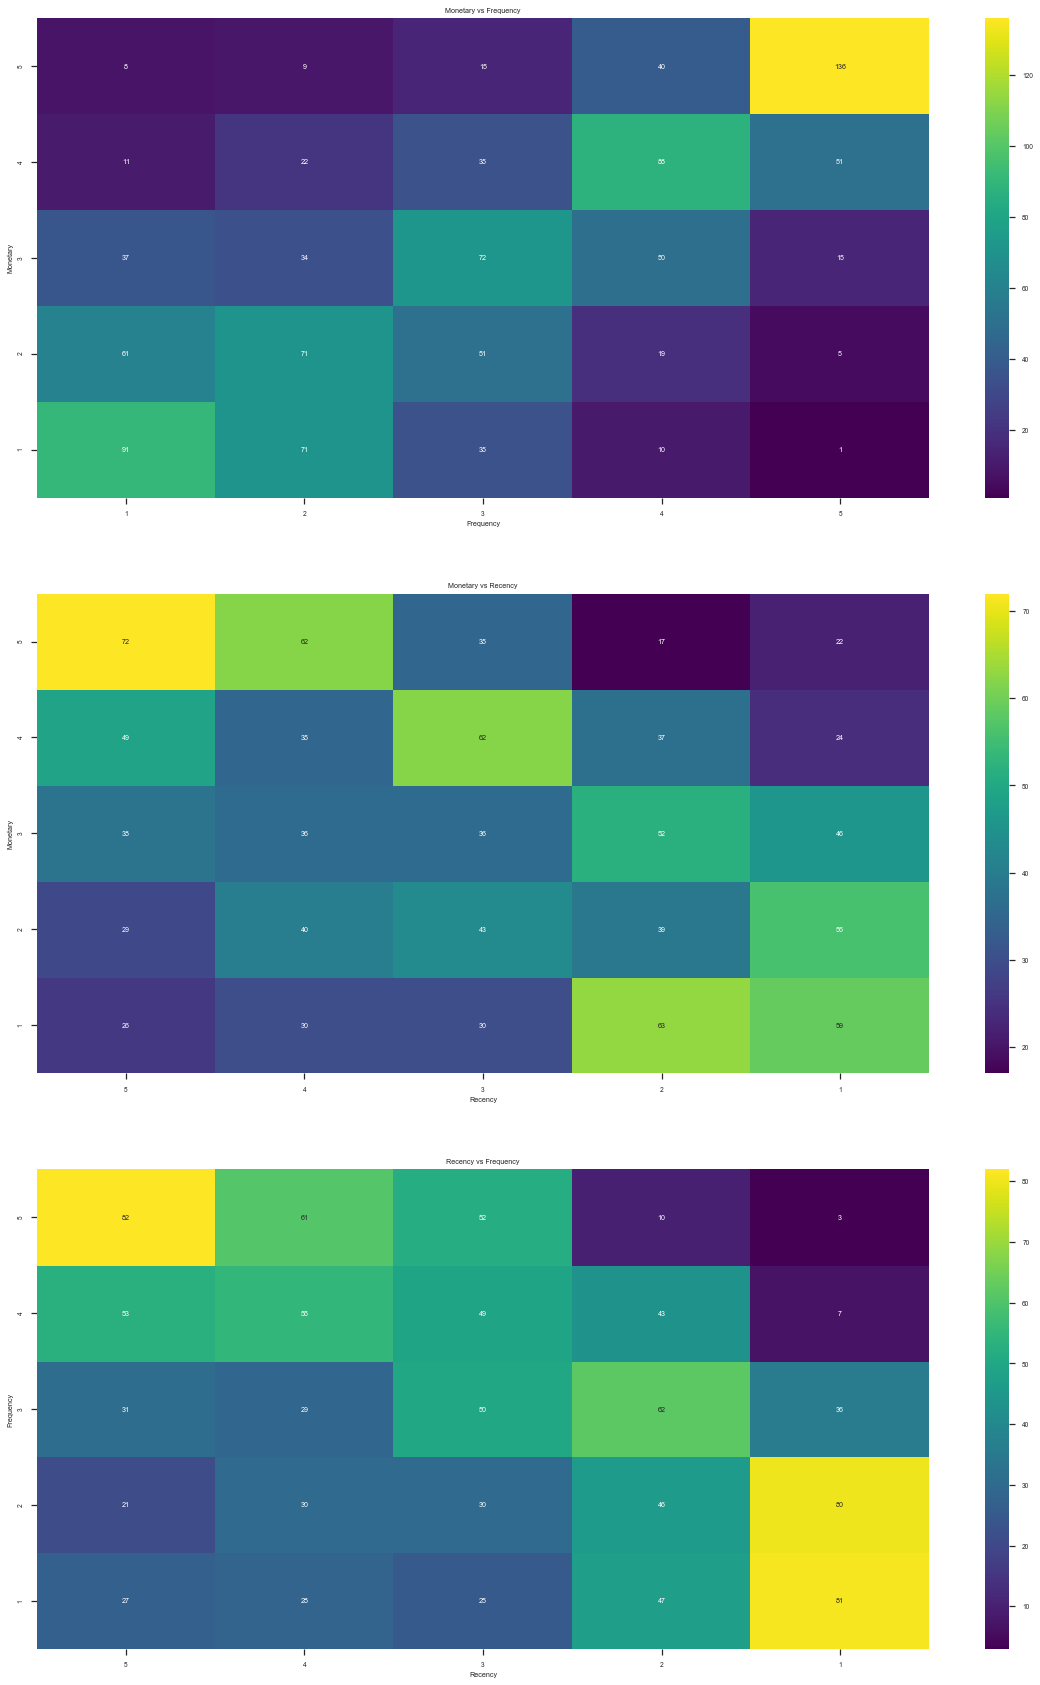

In [16]:
cross_table1 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['frequency_score'])
cross_table2 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['recency_score'])
cross_table3 = pd.crosstab(index=rfm['frequency_score'], columns=rfm['recency_score'])
plt.figure(figsize=(20,30))
plt.subplot(311)
ax1 = sns.heatmap(cross_table1, cmap='viridis', annot=True, fmt=".0f")
ax1.invert_yaxis()
ax1.set_ylabel('Monetary')
ax1.set_xlabel('Frequency')
ax1.set_title('Monetary vs Frequency')
plt.subplot(312)
ax2 = sns.heatmap(cross_table2, cmap='viridis', annot=True, fmt=".0f")
ax2.invert_yaxis()
ax2.set_ylabel('Monetary')
ax2.set_xlabel('Recency')
ax2.set_title('Monetary vs Recency')
plt.subplot(313)
ax3 = sns.heatmap(cross_table3, cmap='viridis', annot=True, fmt=".0f")
ax3.invert_yaxis()
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Recency')
ax3.set_title('Recency vs Frequency')
plt.show()

# K Means

## Outliers


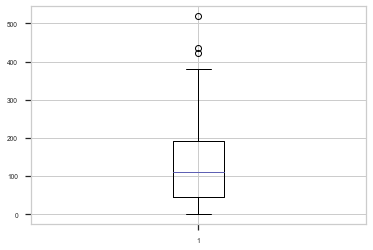

In [17]:
rfm1 = rfm.copy()
plt.boxplot(rfm1.recency)
Q1 = rfm1.recency.quantile(0.25)
Q3 = rfm1.recency.quantile(0.75)
IQR = Q3 - Q1
rfm1 = rfm1[(rfm1.recency >= Q1 - 3*IQR) & (rfm1.recency <= Q3 + 3*IQR)]

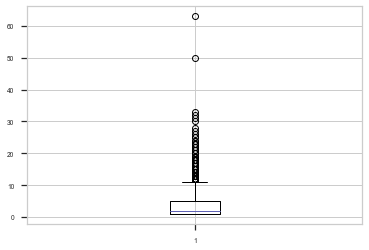

In [18]:
plt.boxplot(rfm1.frequency)
Q1 = rfm1.frequency.quantile(0.25)
Q3 = rfm1.frequency.quantile(0.75)
IQR = Q3 - Q1
rfm1 = rfm1[(rfm1.frequency >= Q1 - 3*IQR) & (rfm1.frequency <= Q3 + 3*IQR)]


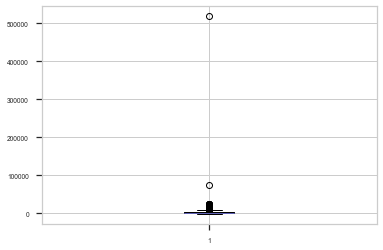

In [19]:
plt.boxplot(rfm1.monetary)
Q1 = rfm1.monetary.quantile(0.25)
Q3 = rfm1.monetary.quantile(0.75)
IQR = Q3 - Q1
rfm1 = rfm1[(rfm1.monetary >= (Q1 - 3*IQR)) & (rfm1.monetary <= (Q3 + 3*IQR))]

In [19]:
rfm2=rfm1[['recency','frequency','monetary']]

In [20]:
scaler = StandardScaler()
x_scaled=scaler.fit(rfm2)
x_scaled=scaler.fit_transform(rfm2)

## Clusters
We will use the elbow method to determine the optimal amount of clusters. If we pick more clusters than necessary the added clusters will not be more descriptive of the data and will increase the amount of distortion. Some clusters will also be very small.

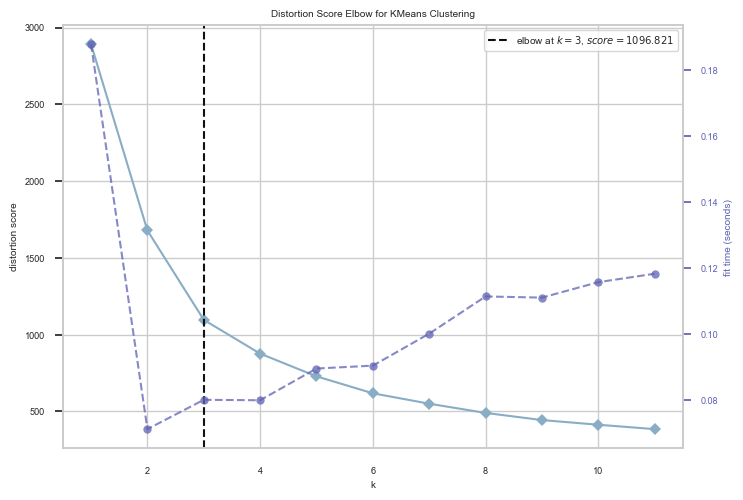

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)
visualizer.show()

In [22]:
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm2)
clusters_scaled = rfm2.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

In [23]:
rfm2['cluster']= clusters_scaled['cluster_pred']
rfm2['segment']= rfm1['segment']

C:\Users\juanv\AppData\Local\Temp\ipykernel_324\2804094801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2['cluster']= clusters_scaled['cluster_pred']
C:\Users\juanv\AppData\Local\Temp\ipykernel_324\2804094801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2['segment']= rfm1['segment']


In [24]:
rfm2 = pd.concat([rfm2,rfm[["recency", "frequency", "monetary", "cluster", "segment"]]]).reset_index().drop_duplicates(subset='customer', keep='first').set_index('customer')
rfm2[["recency_score", "frequency_score", "monetary_score", "score"]] = rfm[["recency_score", "frequency_score", "monetary_score", "score"]]

[0 1 0 0 0 0 0 1 0 2 0 0 1 0 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 2 2 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 0 1 1 0 0 0
 1 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 2 0
 0 1 2 2 2 1 0 1 0 0 0 0 0 1 2 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 2 2 1 0 0 1 0
 0 0 0 0 0 0 1 0 2 1 0 2 0 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0
 2 2 0 2 0 1 0 0 0 0 0 0 2 1 0 1 0 1 2 0 0 0 0 0 0 1 0 0 0 0 1 2 1 1 0 2 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 2 1 0 2 0 1 1 0 1 0 2 1 2 1 0 0 0 0 0
 1 0 0 0 0 0 2 1 1 0 0 1 0 0 0 0 0 1 0 1 1 2 0 1 2 1 0 1 0 1 1 1 0 0 1 0 0
 2 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 2 0 0 1 0 1 2 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 2 0 1 0 0 0 2 0 0 1 2 0 0 0 1 0 1
 1 0 1 1 1 0 1 0 0 0 0 0 2 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 2 0
 2 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 2 2 1 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 2 0 1 0 2 0 0 1 0 2 2 0 1 1 0 2 0 1 2 0 1
 2 0 0 0 0 0 0 0 2 0 0 0 

,recency,frequency,monetary,segment,recency_score,frequency_score,monetary_score,score
cluster,,,,,,,,
0,435,435,435,435,435,435,435,435
1,158,158,158,158,158,158,158,158
2,371,371,371,371,371,371,371,371
3,74,74,74,74,74,74,74,74


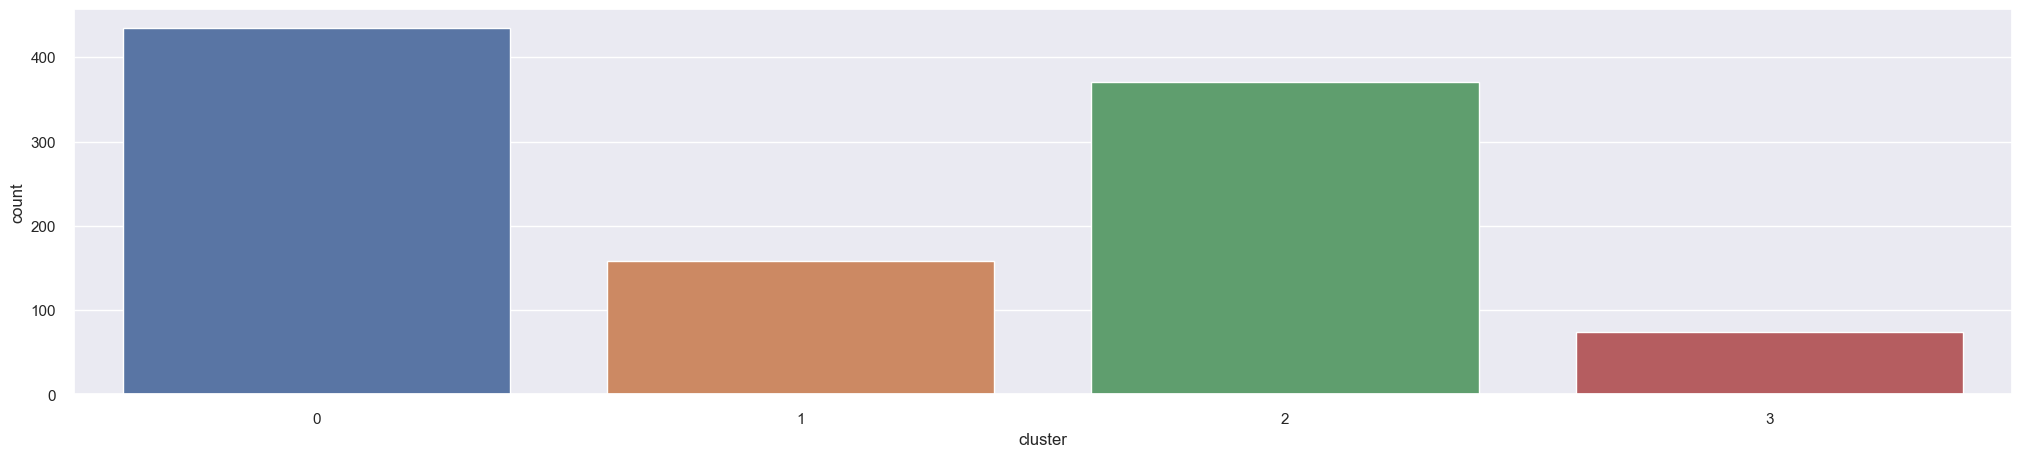

In [25]:
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster", data=rfm2)
rfm2.groupby(['cluster']).count()

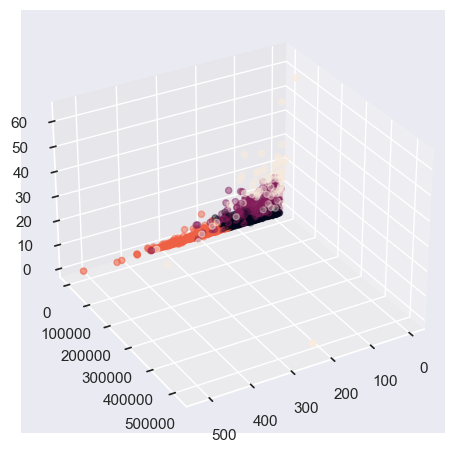

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=rfm2['recency']
yline=rfm2['frequency']
zline=rfm2['monetary']

ax.scatter3D(xline, zline,yline,c=rfm2['cluster'])
ax.view_init(30, 60)

# Data Description

In [27]:
segment_df = rfm2.groupby('segment').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
segment_df

recency            frequency              monetary  \
                          mean  min  max       mean min max          mean   
segment                                                                     
Champion TOP         18.035294    2   35  14.211765   4  63  13413.942588   
Growing Champion     47.618557    7   78   9.144330   3  32   8408.052784   
Loyal Customer       90.045045   15  143   6.963964   2  33   5475.100541   
Potential Loyalist   60.235849    6  143   3.660377   1  18   1031.387264   
New Customer         53.550000    1  141   1.112500   1   2    364.850750   
Promising            43.051282    2  142   1.179487   1   2   1584.885641   
Need Attention       78.540000    7  143   3.260000   1   6   2462.165600   
Cannot Lose Them    267.175000  190  436   1.775000   1   7  16353.084750   
About To Sleep      148.711538   79  212   1.250000   1   3    373.908462   
At Risk             208.509091  145  519   3.463636   1  12   4811.933545   
Hibernating         190.983696   79  380   1.576087   1   4    702.778967   
Lost                271.440476  213  380   1.083333   1   2    258.763929   

                                              
                        min        max count  
segment                                       
Champion TOP        2408.81   76526.32    85  
Growing Champion    2081.63   69358.70    97  
Loyal Customer       910.59   52389.21   111  
Potential Loyalist     0.00    2070.63   106  
New Customer           0.00     853.04    80  
Promising              8.00    7339.84    39  
Need Attention       948.63    7205.03    50  
Cannot Lose Them     982.27  519000.00    40  
About To Sleep         0.00    2006.97    52  
At Risk              460.76   75298.19   110  
Hibernating            0.00    2043.60   184  
Lost               -1952.26     868.32    84

In [28]:
subgroup_df = rfm2.groupby(['cluster','segment']).agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
subgroup_df

recency                frequency              \
                                  mean    min    max       mean   min   max   
cluster segment                                                               
0       Champion TOP         19.000000    6.0   35.0   6.000000   4.0   7.0   
        Growing Champion     20.958333    7.0   38.0   4.583333   3.0   7.0   
        Loyal Customer       78.390625   15.0  143.0   4.671875   2.0   7.0   
        Potential Loyalist   61.040000    6.0  143.0   3.170000   1.0   9.0   
        New Customer         52.443038    1.0  133.0   1.113924   1.0   2.0   
        Promising            40.447368    2.0  140.0   1.184211   1.0   2.0   
        Need Attention       79.428571    7.0  143.0   3.265306   1.0   6.0   
        Cannot Lose Them           NaN    NaN    NaN        NaN   NaN   NaN   
        About To Sleep      112.826087   79.0  139.0   1.565217   1.0   3.0   
        At Risk             156.318182  145.0  176.0   4.681818   2.0   8.0   
        Hibernating         107.806452   79.0  146.0   2.000000   1.0   3.0   
        Lost                       NaN    NaN    NaN        NaN   NaN   NaN   
1       Champion TOP         18.000000    2.0   34.0  10.488372   4.0  17.0   
        Growing Champion     55.716981   14.0   78.0   8.150943   4.0  17.0   
        Loyal Customer      104.263158   71.0  142.0   8.342105   2.0  17.0   
        Potential Loyalist   54.600000   30.0   87.0  10.600000   9.0  13.0   
        New Customer               NaN    NaN    NaN        NaN   NaN   NaN   
        Promising                  NaN    NaN    NaN        NaN   NaN   NaN   
        Need Attention       35.000000   35.0   35.0   3.000000   3.0   3.0   
        Cannot Lose Them    227.666667  226.0  230.0   5.000000   1.0   7.0   
        About To Sleep             NaN    NaN    NaN        NaN   NaN   NaN   
        At Risk             178.733333  145.0  349.0   5.533333   2.0  12.0   
        Hibernating                NaN    NaN    NaN        NaN   NaN   NaN   
        Lost                       NaN    NaN    NaN        NaN   NaN   NaN   
2       Champion TOP               NaN    NaN    NaN        NaN   NaN   NaN   
        Growing Champion           NaN    NaN    NaN        NaN   NaN   NaN   
        Loyal Customer             NaN    NaN    NaN        NaN   NaN   NaN   
        Potential Loyalist         NaN    NaN    NaN        NaN   NaN   NaN   
        New Customer        141.000000  141.0  141.0   1.000000   1.0   1.0   
        Promising           142.000000  142.0  142.0   1.000000   1.0   1.0   
        Need Attention             NaN    NaN    NaN        NaN   NaN   NaN   
        Cannot Lose Them    271.583333  190.0  436.0   1.527778   1.0   6.0   
        About To Sleep      177.172414  139.0  212.0   1.000000   1.0   1.0   
        At Risk             228.656716  155.0  519.0   2.641791   1.0  10.0   
        Hibernating         207.836601  144.0  380.0   1.490196   1.0   4.0   
        Lost                271.440476  213.0  380.0   1.083333   1.0   2.0   
3       Champion TOP         17.945946    3.0   35.0  19.648649   5.0  63.0   
        Growing Champion     58.150000   36.0   72.0  17.250000   6.0  32.0   
        Loyal Customer      112.888889   86.0  143.0  17.444444   6.0  33.0   
        Potential Loyalist    8.000000    8.0    8.0  18.000000  18.0  18.0   
        New Customer               NaN    NaN    NaN        NaN   NaN   NaN   
        Promising                  NaN    NaN    NaN        NaN   NaN   NaN   
        Need Attention             NaN    NaN    NaN        NaN   NaN   NaN   
        Cannot Lose Them    227.000000  227.0  227.0   1.000000   1.0   1.0   
        About To Sleep             NaN    NaN    NaN        NaN   NaN   NaN   
        At Risk             249.333333  178.0  343.0   3.000000   1.0   6.0   
        Hibernating                NaN    NaN    NaN        NaN   NaN   NaN   
        Lost                       NaN    NaN    NaN        NaN   NaN   NaN   

 

In [29]:
df5 = rfm2.groupby('cluster').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
df5

recency            frequency              monetary           \
               mean  min  max       mean min max          mean      min   
cluster                                                                   
0         70.498851    1  176   2.873563   1   9   1531.662552     0.00   
1         71.905063    2  349   8.569620   1  17   6759.233228  1290.46   
2        229.428571  139  519   1.568733   1  10   1207.625660 -1952.26   
3         61.810811    3  343  17.108108   1  63  27818.945541  1442.28   

                          
               max count  
cluster                   
0          7339.84   435  
1         12597.75   158  
2         10071.77   371  
3        519000.00    74

In [30]:
score_df = rfm2.groupby('score').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
score_df

recency            frequency              monetary           \
             mean  min  max       mean min max          mean      min   
score                                                                   
111    275.961538  213  342   1.000000   1   1    117.110385  -496.51   
112    261.280000  213  311   1.000000   1   1    620.420000   376.58   
113    282.368421  218  343   1.000000   1   1   1414.414211   982.27   
114    272.400000  216  296   1.000000   1   1   3230.590000  2215.02   
115    289.000000  226  436   1.000000   1   1  93206.923333  5562.80   
...           ...  ...  ...        ...  ..  ..           ...      ...   
551     14.000000   14   14   7.000000   7   7     62.380000    62.38   
552     15.000000   15   15   7.000000   7   7    577.910000   577.91   
553     19.750000    6   35  11.750000   7  18   1673.372500  1442.28   
554     17.500000    6   35   9.571429   6  17   3703.182143  2408.81   
555     17.709677    2   35  16.564516   6  63  16302.555968  5219.61   

                        
             max count  
score                   
111       367.22    26  
112       868.32    25  
113      1952.50    19  
114      4050.05     5  
115    519000.00     6  
...          ...   ...  
551        62.38     1  
552       577.91     1  
553      1816.63     4  
554      5154.87    14  
555     76526.32    62  

[112 rows x 10 columns]

In [31]:
rfm2.to_excel("fr-2022/database-fr-2022.xlsx")
df5.to_excel("fr-2022/cluster-explanation-fr-2022.xlsx")
subgroup_df.to_excel("fr-2022/clusternsegment-explanation-fr-2022.xlsx")
segment_df.to_excel("fr-2022/segment-explanation-fr-2022.xlsx")
score_df.to_excel("fr-2022/score-explanation-fr-2022.xlsx")

